<a href="https://colab.research.google.com/github/camulro/Aprendizaje-I-new/blob/main/01_kmeans_datos_sinteticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figuras/mbit-logo.png" align="right" style="float" width="200">
<font color="#CA3532"><h1 align="left">Clustering</h1></font>
<h2 align="left">Base de datos sintética. K-means</h2>

Demo interactiva: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Primero importamos las librerías que necesitaremos. También activaremos el modo *inline* para los gráficos generados por *matplotlib*. También inicializaremos la semilla del generador de números aleatorios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

Ahora crearemos un problema no supervisado sintético. El objetivo es entender los conceptos principales con este prolema, luego analizaremos bases de datos reales. Usaremos la función "make_blobs" que genera datos con un número especificado de "blobs". Esta función escoge aleatoriamente los centros de los blobs.

Los parámetros que cambiaremos se comentan aquí:

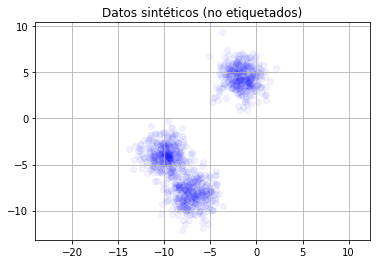

In [2]:
Nblobs = 3 # número de "blobs"
X, y = make_blobs(random_state = 1,  # si cambiamos este parámetro cambiarán los "blobs" de ubicación
                  n_samples = 1000,   # número de puntos que serán generados en la base de datos
                  n_features = 2,     # número de dimensiones
                  centers = Nblobs,   # número de "blobs" (nubes)
                  cluster_std = 1.25) # ancho de cada "blob"

plt.scatter(X[:,0], X[:,1], color = 'b', alpha=0.05)
plt.grid()
plt.axis('equal')
plt.title('Datos sintéticos (no etiquetados)')
plt.show()

In [3]:
X.shape

(1000, 2)

Ahora usaremos el algoritmo de clustering k-means.
El parámetro principal es el número de clusters. Los otros parámetros se comentan en la celda siguiente y se visualizan los resultados obtenidos por este algoritmo:

In [4]:
#X[:,1] = 1000*X[:,1] # para darle mucha más importancia al atributo 0 que al 1

In [5]:
Nclusters = 3     # número de clusters
Nrepetitions = 10 # número de repeticiones (para evitar mínimos locales). Número mínimo: 1
kmeans = KMeans(n_clusters=Nclusters,
                init='random', # random o 'k-means++' (más eficiente)
                n_init=Nrepetitions,#cuantas veces quieres construir k-means desde 0
                max_iter=500,#normalmente en 10 o 20 ya está resuelto
                random_state=2)
kmeans.fit(X)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=2)

In [6]:
a,b = np.unique(kmeans.labels_,return_counts=True)
print(a)
print(b)

[0 1 2]
[326 334 340]


Text(0.5, 1.0, 'Datos sintéticos (no etiquetados)')

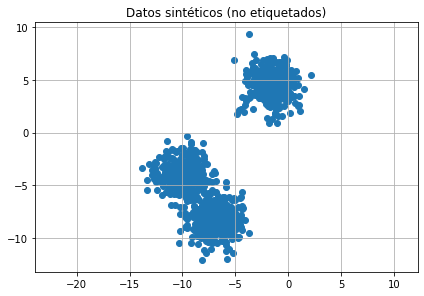

In [7]:
ax = plt.subplot(1, 1, 1)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.grid()
plt.axis('equal')
plt.title('Datos sintéticos (no etiquetados)')

In [8]:
#kmeans.labels_

In [ ]:
print(X.shape)
print(len(kmeans.labels_))
np.unique(kmeans.labels_)

In [10]:
np.sqrt(kmeans.inertia_/1000)

1.7600852590349851

In [11]:
kmeans.cluster_centers_

In [12]:
colors = ['lightgreen', 'orange', 'yellow', 'magenta', 'lightblue']
markers = ['s', 'v', 'o', 'd', 's']
colors = 10*colors
#colors

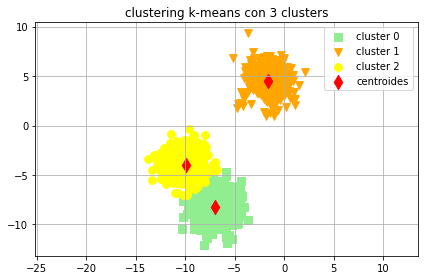

In [13]:
markers = 10*markers

for i in range(Nclusters):
    plt.scatter(X[kmeans.labels_ == i, 0],
                X[kmeans.labels_ == i, 1],
                s = 60, c = colors[i], marker = markers[i],
                label = 'cluster %d' % (i))

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100, marker = 'd',
            c='red', label='centroides')
plt.legend()
plt.grid()
plt.axis('equal')
plt.title('clustering k-means con %d clusters' % Nclusters)
plt.tight_layout()
plt.show()

Uno de los problemas principales es cómo ajustar el número de clusters. Hay muchas estrategias. Una es usando el índice de calidad de clustering "Silhouette" para encontrar este número. Otra es usar otra métrica como el score de Calinski-Harabasz. La siguiente celda implementa estas estrategias:

In [14]:
Nclusters_max = 15
Nrepetitions = 10
#qmetric = metrics.silhouette_score
qmetric = metrics.calinski_harabasz_score

qualities = []
inertias = []
models = []
for k in range(1,Nclusters_max+1):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', n_init=Nrepetitions,
                    max_iter=500, random_state=1)
    kmeans.fit(X)
    models.append(kmeans)
    inertias.append(kmeans.inertia_)
    if k >1:
        qualities.append(qmetric(X, kmeans.labels_))
    else:
        qualities.append(0)

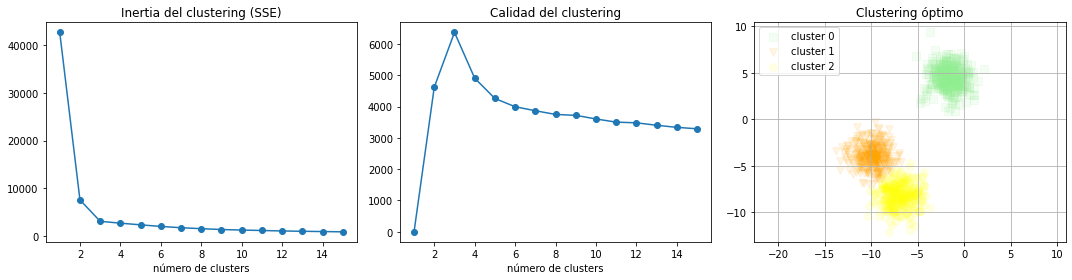

Número de clusters óptimo: 3


In [15]:
fig = plt.figure(figsize=(15,4))

ax = plt.subplot(1,3,1)
plt.plot(range(1,Nclusters_max+1), inertias, marker='o')
plt.xlabel('número de clusters')
plt.title('Inertia del clustering (SSE)')

ax = plt.subplot(1, 3, 2)
plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('número de clusters')
plt.title('Calidad del clustering')

ax = plt.subplot(1, 3, 3)
best = pd.Series(qualities).idxmax() # encuentra el índice del mejor modelo
kmeans = models[best]
n_clusters = kmeans.get_params()['n_clusters']
for i in range(n_clusters):
    inds = np.where(kmeans.labels_ == i)[0]
    plt.scatter(X[inds, 0],
                X[inds, 1],
                s = 60,
                c = colors[i], marker = markers[i],
                label = 'cluster %d' % (i), alpha=0.1)

plt.legend()
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.title('Clustering óptimo')
plt.show()

print('Número de clusters óptimo: %d' % n_clusters)

Prueba diferentes parámetros y problemas sintéticos para comprender cómo funciona k-means en estos problemas de dos dimensiones.

- ¿Descubre siempre k-means los clusters "reales"?
- ¿Qué ocurre si los "blobs" están "demasiado" cerca?
- ¿Encuentra siempre la estrategia basada en el índice Silhouette el número "real" de clusters?
- ¿Y la basada en el índice Calinski-Harabasz?